In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


I want to calculate the correlation between the preciptation and total case
However, we measure this correlation as a function of lag

In [8]:
X_train = pd.read_csv("dengue_features_train.csv")
y_train = pd.read_csv("dengue_labels_train.csv")

In [9]:
X_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [10]:
y_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [11]:
df = X_train.merge(y_train, on=['city', 'year', 'weekofyear'])

In [12]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [14]:
df = df.assign(date=lambda df: pd.to_datetime(df["week_start_date"])).set_index("date")

In [33]:
df['precipitation_amt_mm'].head()

date
1990-04-30    12.42
1990-05-07    22.82
1990-05-14    34.54
1990-05-21    15.36
1990-05-28     7.52
Name: precipitation_amt_mm, dtype: float64

In [31]:
df['precipitation_amt_mm'].shift(1)

date
1990-04-30      NaN
1990-05-07    12.42
1990-05-14    22.82
1990-05-21    34.54
1990-05-28    15.36
              ...  
2010-05-28     1.15
2010-06-04    55.30
2010-06-11    86.47
2010-06-18    58.94
2010-06-25    59.67
Name: precipitation_amt_mm, Length: 1456, dtype: float64

In [34]:
df.assign(x=df['precipitation_amt_mm'].shift(1))[["precipitation_amt_mm", "x", "total_cases"]]

,precipitation_amt_mm,x,total_cases
date,,,
1990-04-30,12.42,NaN,4
1990-05-07,22.82,12.42,5
1990-05-14,34.54,22.82,4
1990-05-21,15.36,34.54,3
1990-05-28,7.52,15.36,6
...,...,...,...
2010-05-28,55.30,1.15,5
2010-06-04,86.47,55.30,8
2010-06-11,58.94,86.47,1


In [40]:
def correlate(df, shift):
    return(
        df.assign(x=df['precipitation_amt_mm'].shift(shift))
        .loc[:, ["x", "total_cases"]]
        .corr()
        .values[0,1]

    )

In [47]:
import numpy as np

X = range(0,53)
y = [correlate(df,x) for x in X]

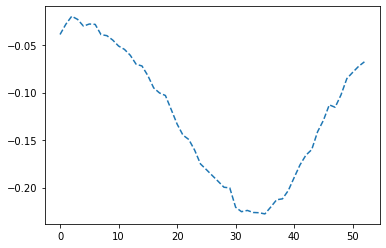

In [51]:
plt.plot(X,y, '--')

In [53]:
def correlate_1(df, col_1, col_2, shift=0):
    return(
        df.assign(x=df[col_1].shift(shift))
        .loc[:, ["x", col_2]]
        .corr()
        .values[0,1]

    )

In [57]:
X = range(0,53)
y = [correlate_1(df, "precipitation_amt_mm", "total_cases", x) for x in X]

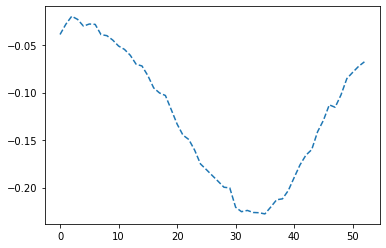

In [59]:
plt.plot(X,y, '--')

In [60]:
X_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

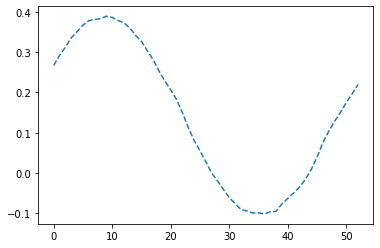

In [74]:
X = range(0,53)
y = [correlate_1(df, "station_min_temp_c", "total_cases", x) for x in X]
plt.plot(X,y, '--')

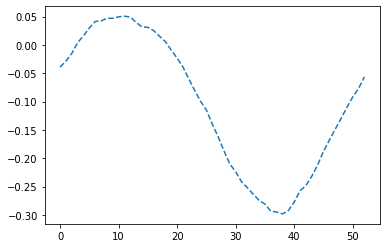

In [76]:
X = range(0,53)
y = [correlate_1(df, "station_max_temp_c", "total_cases", x) for x in X]
plt.plot(X,y, '--')